In [1]:
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline

In [68]:
gc = GCRCatalogs.load_catalog('protoDC2_test')
galaxy_data = gc.get_quantities(['ra', 'dec', 'mag_r','halo_id'],filters=['mag_r < 19'])
cluster_data = gc.get_quantities(['ra','dec', 'halo_mass','halo_id'], 
                                 filters=['isCentral','halo_mass > 1e14', 'redshift < 0.2'])

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:114: UserWarning: No md5 sum specified in the config file
  warnings.warn('No md5 sum specified in the config file')


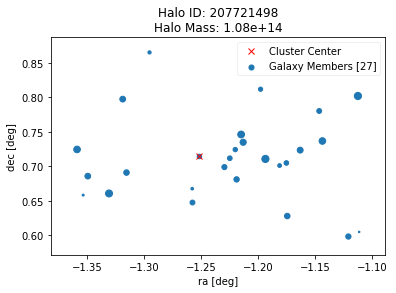

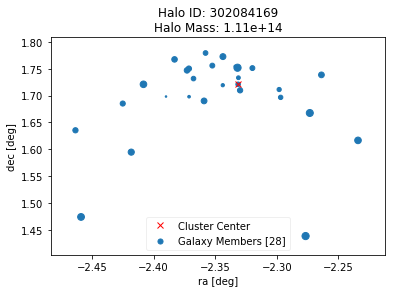

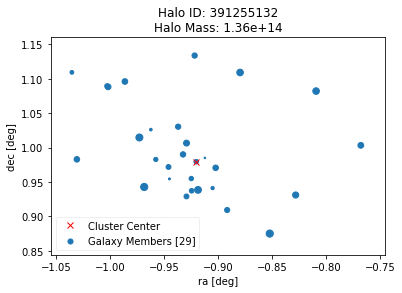

In [69]:
for i in range(0, len(cluster_data['ra'])):
    ra, dec = cluster_data['ra'][i], cluster_data['dec'][i]
    halo_id, halo_mass = cluster_data['halo_id'][i], cluster_data['halo_mass'][i]
    slct_clstr = galaxy_data['halo_id']==halo_id
    plt.figure()
    plt.scatter(galaxy_data['ra'][slct_clstr], galaxy_data['dec'][slct_clstr],
                s=(19-galaxy_data['mag_r'])*8, label ='Galaxy Members [{}]'.format(np.sum(slct_clstr)))
    plt.plot(ra,dec,'xr',label='Cluster Center')
    plt.legend(loc='best',framealpha=0.3)
    plt.xlabel(r'ra [deg]')
    plt.ylabel(r'dec [deg]')
    plt.title('Halo ID: {}\nHalo Mass: {:.2e}'.format(halo_id, halo_mass))
    if(i+1==3):
        break
        
plt.show()